Importing Librabries

In [4]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Uploading The Dataset

In [5]:
df=pd.read_csv('dataset.csv',encoding='latin=1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Understanding the Dataset

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.shape

(5572, 5)

In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

Data Visualization

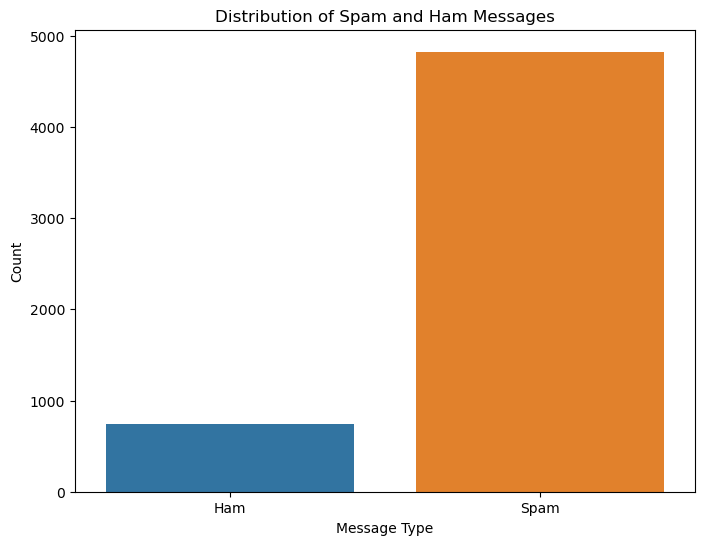

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

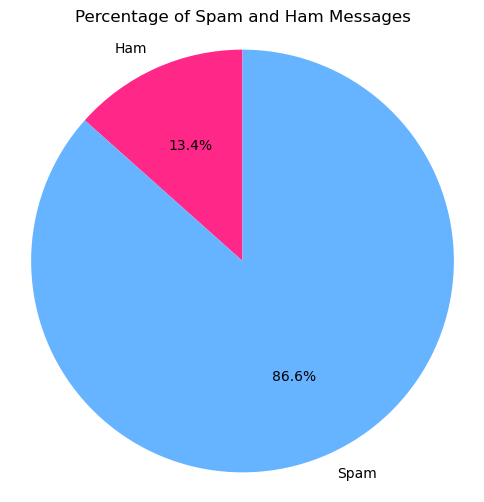

In [34]:
spam_count = df['Category'].value_counts()[1]
ham_count = df['Category'].value_counts()[0]
plt.figure(figsize=(6, 6))
Category = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=Category, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Data Preprocessing

In [13]:
mailData=df.where((pd.notnull(df)),'')

In [14]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [15]:
new = {"v1":"Category","v2":"Message"}
df.rename(columns = new,inplace = True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.loc[df["Category"]=="spam","Category"]=0
df.loc[df["Category"]=="ham","Category"]=1
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


Splitting The Dataset

In [17]:
x=df["Message"]
y=df["Category"]
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [18]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 100)

In [20]:
x_train

204                             U call me alter at 11 ok.
334     Valentines Day Special! Win over å£1000 in our...
4464    \CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...
3961    You have been specially selected to receive a ...
5431                   If I was I wasn't paying attention
                              ...                        
4149    I only work from mon to thurs but Sat i cant l...
1890    Ok but knackered. Just came home and went to s...
350     Nah can't help you there, I've never had an ip...
79      Its not the same here. Still looking for a job...
3927       Babe ? I lost you ... Will you try rebooting ?
Name: Message, Length: 3343, dtype: object

In [21]:
y_train

204     1
334     0
4464    1
3961    0
5431    1
       ..
4149    1
1890    1
350     1
79      1
3927    1
Name: Category, Length: 3343, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
featureCollection=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
messageTrainFeatures=featureCollection.fit_transform(x_train)
messageTestFeatures=featureCollection.transform(x_test)


In [24]:
y_trainint=y_train.astype("int")
y_testint=y_test.astype("int")

Model Selection And Prediction

In [ ]:
lr=LogisticRegression()
lr.fit(messageTrainFeatures,y_trainint)

LogisticRegression()

In [ ]:
pred=lr.predict(messageTestFeatures)

In [ ]:
acc=accuracy_score(y_testint,pred)
print("Accuracy is:",acc)

Accuracy is: 0.9573799910273665


In [ ]:
testInputData=["Mass and Energy are interchangeable under certain circumstances.When atoms split,the process is called Nuclear Fission."]
testDataFeatures=featureCollection.transform(testInputData)
judgement1=lr.predict(testDataFeatures)
if judgement1[0]==1:
    print("Sample 1: This is a Spam mail")
else:
    print("Sample 1: This is not a Spam mail")

Sample 1: This is a Spam mail


In [ ]:
testData2=input("Enter a message to check if it's spam or not:")
testDataFeatures2=featureCollection.transform([testData2])
judgement2=lr.predict(testDataFeatures2)
if (judgement2[0]==1):
    print("Sample 2: This is not a Spam mail")
else:
    print("Sample 2: This is a Spam mail")


Sample 2: This is not a Spam mail
